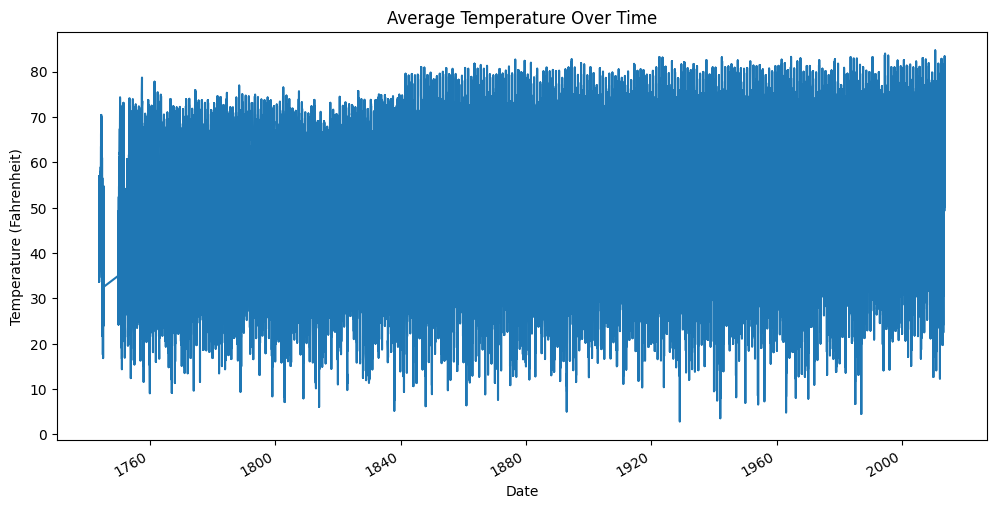

Results of Dickey-Fuller Test:
Test Statistic                    -2.813577
p-value                            0.056360
#Lags Used                        57.000000
Number of Observations Used    47483.000000
Critical Value (1%)               -3.430488
Critical Value (5%)               -2.861601
Critical Value (10%)              -2.566802
dtype: float64


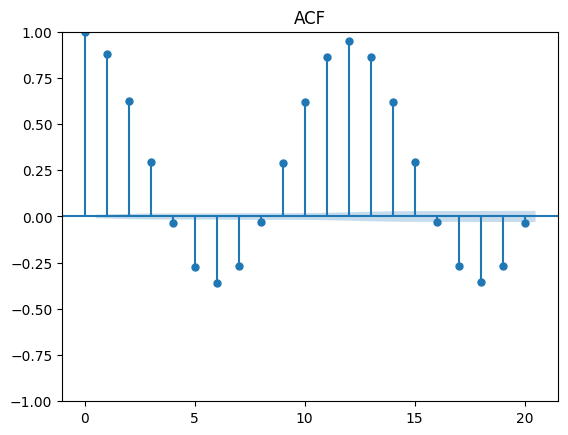

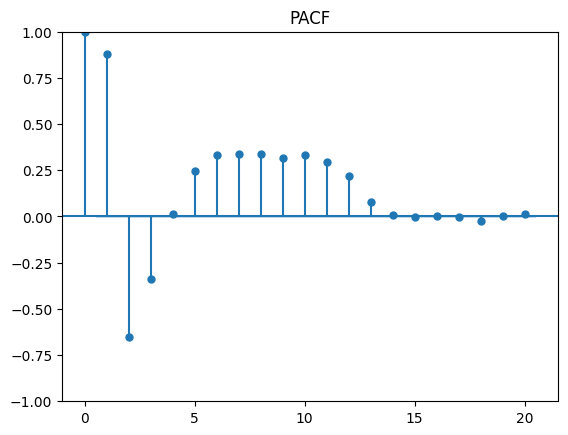

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311

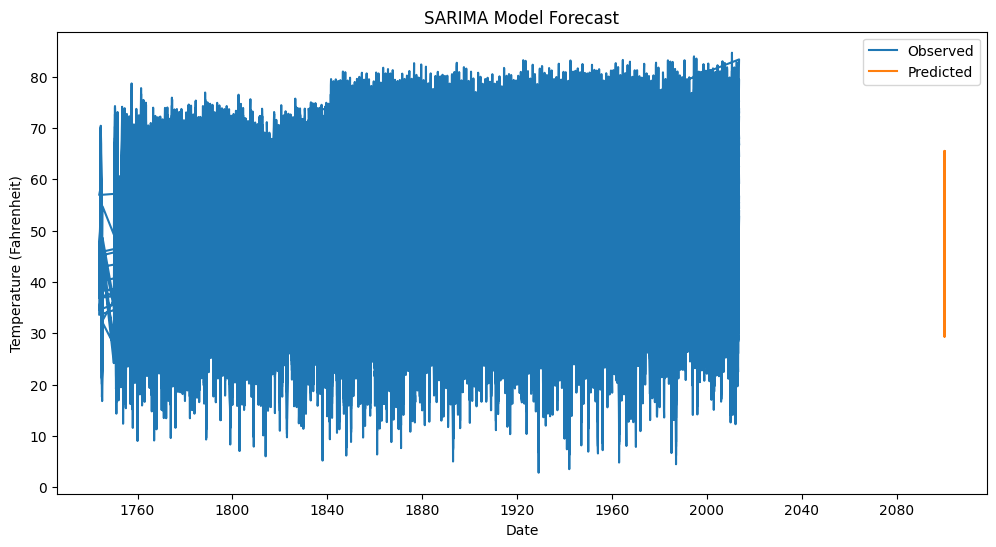

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv("temperature.csv")

# Preprocess the dataset
df['Date'] = pd.to_datetime(df[['month', 'day', 'year']])
df.set_index('Date', inplace=True)
df.dropna(subset=['AverageTemperatureFahr'], inplace=True)
ts = df['AverageTemperatureFahr']

# Explore the dataset
ts.plot(figsize=(12, 6))
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()

# Check for stationarity of time series
def test_stationarity(timeseries):
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(ts)

# Determine SARIMA model parameters p, d, q
plot_acf(ts, lags=20)
plt.title('ACF')
plt.show()

plot_pacf(ts, lags=20)
plt.title('PACF')
plt.show()

# Fit the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # SARIMA(1,1,1)(1,1,1,12)
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make time series predictions and Auto-fit the SARIMA model
pred_start = len(ts)
pred_end = pred_start + 24  # 2 years ahead
predictions = results.predict(start=pred_start, end=pred_end, dynamic=False)

# Evaluate model predictions
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(predictions, label='Predicted')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.show()
